In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
import datashader as ds, datashader.transfer_functions as tf
import dask.dataframe as dd

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)

In [5]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)
#background = "black"
background=None

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

In [6]:
import sys
sys.path.append('..')
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [7]:
corder = ['C1', 'C2', 'C3', 'C4', 'C0']

In [8]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH','MIN', ]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
mpalette = sns.color_palette(mpalette, n_colors=5)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [9]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Axenic',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [10]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [11]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [12]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [13]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = '../results/final/ponly/'

In [14]:
import glob
import os
glob.glob(os.path.join(dpath, "*_sum*"))

['../results/final/ponly/monte_ponly_OVERFLOW-ROS_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_EXOENZYME-ROS-MIXOTROPH_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_ROS-MIXOTROPH_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_EXOENZYME-ROS_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_OVERFLOW-EXOENZYME-MIXOTROPH_clean_sum.csv.gz',
 '../results/final/ponly/ponly_monte_add_ROS_round2_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_OVERFLOW-ROS-EXOENZYME_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_OVERFLOW-MIXOTROPH_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_add_OVERFLOW_clean_sum.csv.gz',
 '../results/final/ponly/monte_strong_ponly_clean_sum.csv.gz',
 '../results/final/ponly/monte_extend_ponly_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_clean_sum.csv.gz',
 '../results/final/ponly/monte_ponly_EXOENZYME-MIXOTROPH_clea

In [15]:
'monte_ponly_clean_sum.csv.gz'
'monte_strong_ponly_clean_sum.csv.gz'
'monte_ponly_add_OVERFLOW_clean_sum.csv.gz'
'monte_ponly_fix_OVERFLOW_clean_sum.csv.gz'
'ponly_monte_add_ROS_round2_clean_sum.csv.gz'


'ponly_monte_add_ROS_round2_clean_sum.csv.gz'

In [16]:
sim_df1 = pd.read_csv(os.path.join(dpath,'monte_ponly_clean_sum.csv.gz',))
sim_df2 = pd.read_csv(os.path.join(dpath,'monte_strong_ponly_clean_sum.csv.gz',))
sim_df3 = pd.read_csv(os.path.join(dpath,'monte_ponly_fix_OVERFLOW_clean_sum.csv.gz',))
sim_df4 = pd.read_csv(os.path.join(dpath,'monte_ponly_add_OVERFLOW_clean_sum.csv.gz',))
sim_df5 = pd.read_csv(os.path.join(dpath,'ponly_monte_add_ROS_round2_clean_sum.csv.gz',))


In [17]:
sim_df6 = pd.read_csv(os.path.join(dpath,'monte_extend_ponly_clean_sum.csv.gz',))

multi_ponly_orig_fnames = [
'monte_ponly_EXOENZYME-MIXOTROPH_clean_sum.csv.gz',
'monte_ponly_EXOENZYME-ROS_clean_sum.csv.gz',
'monte_ponly_EXOENZYME-ROS-MIXOTROPH_clean_sum.csv.gz',
'monte_ponly_OVERFLOW-EXOENZYME_clean_sum.csv.gz',
'monte_ponly_OVERFLOW-EXOENZYME-MIXOTROPH_clean_sum.csv.gz',
'monte_ponly_OVERFLOW-MIXOTROPH_clean_sum.csv.gz',
'monte_ponly_OVERFLOW-ROS_clean_sum.csv.gz',
'monte_ponly_OVERFLOW-ROS-EXOENZYME_clean_sum.csv.gz',
'monte_ponly_OVERFLOW-ROS-MIXOTROPH_clean_sum.csv.gz',
'monte_ponly_ROS-MIXOTROPH_clean_sum.csv.gz',
'monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_clean_sum.csv.gz',
]
sim_df7 = pd.concat([pd.read_csv(os.path.join(dpath,f,)) for f in multi_ponly_orig_fnames], ignore_index=True)


In [18]:
sim_df1['Phase'] = 'init'
sim_df2['Phase'] = 'add'
sim_df3['Phase'] = 'init'
sim_df4['Phase'] = 'add'
sim_df5['Phase'] = 'round2'
sim_df6['Phase'] = 'extend'
sim_df7['Phase'] = 'init'


In [19]:
# remove buggy overflow simulations
sim_df1 = sim_df1.loc[~sim_df1.run_id.str.startswith('monte_ponly_OVERFLOW')].copy()
sim_df2 = sim_df2.loc[~sim_df2.run_id.str.startswith('monte2_ponly_OVERFLOW')].copy()


In [20]:
sim_df1[['id', 'media', 'which', 'model', 'hash']] =     sim_df1.run_id.str.rsplit('_', n=4, expand=True)
sim_df2[['id', 'media', 'which', 'model', 'hash']] =     sim_df2.run_id.str.rsplit('_', n=4, expand=True)
sim_df3[['id', 'media', 'which', 'model', 'hash']] =     sim_df3.run_id.str.rsplit('_', n=4, expand=True)
sim_df4[['id', 'media', 'which', 'model', 'hash']] =     sim_df4.run_id.str.rsplit('_', n=4, expand=True)
sim_df5[['id', 'media', 'which', 'model', 'hash']] =     sim_df5.run_id.str.rsplit('_', n=4, expand=True)
sim_df6[['id', 'media', 'which', 'model', 'hash']] =     sim_df6.run_id.str.rsplit('_', n=4, expand=True)
sim_df7[['id', 'media', 'which', 'model', 'hash']] =     sim_df7.run_id.str.rsplit('_', n=4, expand=True)


In [21]:
sim_df1['VPRO_nocluster'] = sim_df1.idx.str.replace('monte_ponly_','vpro_', regex=False)
sim_df1['VPRO_nocluster'] = sim_df1['VPRO_nocluster'].str.replace('_monte__','_', regex=False)
for m in morder:
    sim_df1['VPRO_nocluster'] = sim_df1['VPRO_nocluster'].str.replace(f'_{m}_','_', regex=False)


In [22]:
sim_df2['VPRO'] = sim_df2.idx.str.replace('monte2_ponly_','', regex=False)
sim_df2['VPRO'] = sim_df2['VPRO'].str.replace(r'_monte__(\d+)_[^_]+$', r'\1', regex=True)
sim_df2['VPRO'] = sim_df2['VPRO'].str.replace(r'.*_vpro', 'vpro', regex=True)


In [23]:
sim_df3['VPRO'] = sim_df3.idx.str.replace('monte_ponly_fix_OVERFLOW_','vpro_2_', regex=False)
sim_df3['VPRO'] = sim_df3['VPRO'].str.replace('_monte__','_', regex=False)
for m in morder:
    sim_df3['VPRO'] = sim_df3['VPRO'].str.replace(f'_{m}_','_', regex=False)


In [24]:
sim_df4['VPRO'] = sim_df4.idx.str.replace('monte2_ponly_OVERFLOW_','', regex=False)
sim_df4['VPRO'] = sim_df4['VPRO'].str.replace(r'_monte__(\d+)_[^_]+$', r'\1', regex=True)
sim_df4['VPRO'] = sim_df4['VPRO'].str.replace(r'.*_vpro', 'vpro', regex=True)


In [25]:
#sim_df6['VPRO'] = sim_df6.idx.str.replace('monte2_ponly_OVERFLOW_','', regex=False)
sim_df5['VPRO'] = sim_df5['idx'].str.replace('_monte__','', regex=False)
sim_df5['VPRO'] = sim_df5['VPRO'].str.replace(r'.*_vpro', 'vpro_2', regex=True)


In [26]:
#sim_df6['VPRO'] = sim_df6.idx.str.replace('monte2_ponly_OVERFLOW_','', regex=False)
sim_df6['VPRO'] = sim_df6['idx'].str.replace('_monte__','_', regex=False)
sim_df6['VPRO'] = sim_df6['VPRO'].str.replace(r'.*_vpro', 'vpro_3', regex=True)


In [27]:
sim_df7['VPRO'] = sim_df7.idx.str.replace('monte_ponly_','vpro_', regex=False)
sim_df7['VPRO'] = sim_df7['VPRO'].str.replace('_monte__','_', regex=False)
for m in sim_df7.model.unique():
    sim_df7['VPRO'] = sim_df7['VPRO'].str.replace(f'_{m}_','_', regex=False)


In [28]:
sim_df2['VPRO_nocluster'] = sim_df2['VPRO']
sim_df3['VPRO_nocluster'] = sim_df3['VPRO']
sim_df4['VPRO_nocluster'] = sim_df4['VPRO']
sim_df5['VPRO_nocluster'] = sim_df5['VPRO']
sim_df6['VPRO_nocluster'] = sim_df6['VPRO']
sim_df7['VPRO_nocluster'] = sim_df7['VPRO']



In [29]:
df = pd.concat([
    sim_df1,
    sim_df2,
    sim_df3,
    sim_df4,
    sim_df5,
    sim_df6,
    sim_df7,
    
], ignore_index=True)

In [30]:
df

VmaxICp  VmaxICh       VmaxINp   VmaxINh       VmaxOCp       VmaxOCh  \
0       0.000002      0.0  2.563161e-06  0.000002  0.000000e+00  5.541667e-08   
1       0.000006      0.0  3.520779e-05  0.000002  0.000000e+00  5.541667e-08   
2       0.000030      0.0  1.030144e-05  0.000002  0.000000e+00  5.541667e-08   
3       0.000005      0.0  6.256836e-06  0.000002  0.000000e+00  5.541667e-08   
4       0.000004      0.0  7.170524e-06  0.000002  0.000000e+00  5.541667e-08   
...          ...      ...           ...       ...           ...           ...   
466169  0.000006      0.0  1.201227e-05  0.000067  1.851852e-06  6.666667e-05   
466170  0.000002      0.0  5.716312e-07  0.000067  2.462753e-07  6.666667e-05   
466171  0.000006      0.0  5.555556e-06  0.000067  1.851852e-06  6.666667e-05   
466172  0.000032      0.0  2.628276e-05  0.000067  1.665043e-06  6.666667e-05   
466173  0.000006      0.0  8.250154e-07  0.000067  9.867681e-07  6.666667e-05   

             VmaxONp       VmaxONh        KICp  KICh  ...  \
0       0.000000e+00  4.277778e-08   37.000000   1.0  ...   
1       0.000000e+00  4.277778e-08   24.605317   1.0  ...   
2       0.000000e+00  4.277778e-08  215.112381   1.0  ...   
3       0.000000e+00  4.277778e-08    8.853069   1.0  ...   
4       0.000000e+00  4.277778e-08    7.193827   1.0  ...   
...              ...           ...         ...   ...  ...   
466169  7.544491e-07  6.666667e-05    7.601540   1.0  ...   
466170  2.545232e-07  6.666667e-05   10.321623   1.0  ...   
466171  1.111111e-06  6.666667e-05   37.000000   1.0  ...   
466172  2.714144e-07  6.666667e-05   37.000000   1.0  ...   
466173  8.924395e-07  6.666667e-05   86.852441   1.0  ...   

                                                   run_id  \
0       monte_ponly_EXOENZYME_76_monte__69_pro99_ponly...   
1       monte_ponly_EXOENZYME_86_monte__38_lowN_ponly_...   
2       monte_ponly_EXOENZYME_29_monte__60_pro99_ponly...   
3       monte_ponly_EXOENZYME_23_monte__20_lowN_ponly_...   
4       monte_ponly_EXOENZYME_20_monte__81_lowN_ponly_...   
...                                                   ...   
466169  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_6...   
466170  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_2...   
466171  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_3...   
466172  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_7...   
466173  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_8...   

                                                      idx  Phase  \
0            monte_ponly_EXOENZYME_76_monte__69_EXOENZYME   init   
1            monte_ponly_EXOENZYME_86_monte__38_EXOENZYME   init   
2            monte_ponly_EXOENZYME_29_monte__60_EXOENZYME   init   
3            monte_ponly_EXOENZYME_23_monte__20_EXOENZYME   init   
4            monte_ponly_EXOENZYME_20_monte__81_EXOENZYME   init   
...                                                   ...    ...   
466169  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_6...   init   
466170  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_2...   init   
466171  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_3...   init   
466172  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_7...   init   
466173  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_8...   init   

                                                       id  media  which  \
0                      monte_ponly_EXOENZYME_76_monte__69  pro99  ponly   
1                      monte_ponly_EXOENZYME_86_monte__38   lowN  ponly   
2                      monte_ponly_EXOENZYME_29_monte__60  pro99  ponly   
3                      monte_ponly_EXOENZYME_23_monte__20   lowN  ponly   
4                      monte_ponly_EXOENZYME_20_monte__81   lowN  ponly   
...                                                   ...    ...    ...   
466169  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_6...   lowN  ponly   
466170  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_2...   lowN  ponly   
466171  monte_ponly_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_3...   lowN  ponly   
466

In [31]:
df[['Phase', 'media']].value_counts()

Phase   media
init    lowN     159638
        pro99    159638
extend  lowN      58786
        pro99     58786
round2  lowN       8462
        pro99      8462
add     lowN       6201
        pro99      6201
Name: count, dtype: int64

In [32]:
df = df.loc[df.media.isin(['lowN'])].copy()

In [33]:
df[['Phase', 'model']].value_counts()

Phase   model                           
init    EXOENZYME-ROS-MIXOTROPH             10000
        ROS-MIXOTROPH                        9999
        EXOENZYME-MIXOTROPH                  9998
        OVERFLOW-MIXOTROPH                   9997
        OVERFLOW-EXOENZYME-MIXOTROPH         9997
        MIXOTROPH                            9997
        OVERFLOW-ROS-MIXOTROPH               9997
        ROS-MIXOTROPH-OVERFLOW-EXOENZYME     9994
        OVERFLOW-EXOENZYME                   9962
        EXOENZYME-ROS                        9960
        EXOENZYME                            9959
        ROS                                  9958
        MIN                                  9958
        OVERFLOW-ROS-EXOENZYME               9958
        OVERFLOW                             9955
        OVERFLOW-ROS                         9949
round2  ROS                                  8462
extend  OVERFLOW-EXOENZYME                   4966
        OVERFLOW-MIXOTROPH                   4395
        M

In [34]:
import os
import glob
dpath = '../results/final/het/'
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    df['Phase'] = category
    return df
vpro_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'versatile_vpros_*'))], ignore_index=True)


../results/final/het/versatile_vpros_monte_add_het_clean.csv add
../results/final/het/versatile_vpros_monte_het_extend_ROS.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-ROS-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW.csv extend
../results/final/het/versatile_vpros_monte_ROS_round2_het.csv round2
../results/final/het/versatile_vpros_monte_het_extend_MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_multi.csv init
../results/final/het/versatile_vpros_monte_het_extend_ROS-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_EXOENZYME-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_MIN.csv extend
../results/final/het/versatile_vpros_monte_het_extend_ROS-MIXOTROPH-OVERFLOW-EXOENZYME.

In [35]:
vpro_df['VPRO_nocluster'] =  vpro_df.VPRO.str.replace(r'_C\d$', '', regex=True)

In [36]:
vpro_df

model                                               VPRO  \
0               EXOENZYME                         vpro_11_62_EXOENZYME_C1_15   
1               EXOENZYME                         vpro_11_62_EXOENZYME_C1_20   
2               EXOENZYME                         vpro_11_62_EXOENZYME_C1_22   
3               EXOENZYME                         vpro_11_62_EXOENZYME_C1_32   
4               EXOENZYME                         vpro_11_62_EXOENZYME_C1_37   
...                   ...                                                ...   
19741  OVERFLOW-EXOENZYME  vpro_3_9_77_OVERFLOW-EXOENZYME__75_OVERFLOW-EX...   
19742  OVERFLOW-EXOENZYME  vpro_3_9_77_OVERFLOW-EXOENZYME__81_OVERFLOW-EX...   
19743  OVERFLOW-EXOENZYME  vpro_3_9_77_OVERFLOW-EXOENZYME__91_OVERFLOW-EX...   
19744  OVERFLOW-EXOENZYME  vpro_3_9_77_OVERFLOW-EXOENZYME__92_OVERFLOW-EX...   
19745  OVERFLOW-EXOENZYME  vpro_3_9_77_OVERFLOW-EXOENZYME__97_OVERFLOW-EX...   

       Inhibited  Neutral  Other  Strong  Sustained  Weak  pos_interaction  \
0              0        0    0.0     0.0        0.0     3                0   
1              0        1    0.0     0.0        2.0    25                2   
2              0        0    0.0     0.0        0.0     6                0   
3              0        2    0.0     0.0        0.0     3                0   
4              0        6    0.0     0.0        0.0     7                0   
...          ...      ...    ...     ...        ...   ...              ...   
19741          0        5    9.0     0.0        0.0     5                0   
19742          0        6    1.0     0.0        7.0     2                7   
19743          0        5    0.0     0.0        0.0    15                0   
19744          0        3   12.0     0.0        0.0    12                0   
19745          0        3    0.0     0.0        0.0    13                0   

       neg_interaction  Versatile   Phase  \
0                    3      False     add   
1                   25       True     add   
2                    6      False     add   
3                    3      False     add   
4                    7      False     add   
...                ...        ...     ...   
19741                5      False  extend   
19742                2       True  extend   
19743               15      False  extend   
19744               12      False  extend   
19745               13      False  extend   

                                          VPRO_nocluster  
0                             vpro_11_62_EXOENZYME_C1_15  
1                             vpro_11_62_EXOENZYME_C1_20  
2                             vpro_11_62_EXOENZYME_C1_22  
3                             vpro_11_62_EXOENZYME_C1_32  
4                             vpro_11_62_EXOENZYME_C1_37  
...                                                  ...  
19741  vpro_3_9_77_OVERFLOW-EXOENZYME__75_OVERFLOW-EX...  
19742  vpro_3_9_77_OVERFLOW-EXOENZYME__81_OVERFLOW-EX...  
19743  vpro_3_9_77_OVERFLOW-EXOENZYME__91_OVERFLOW-EX...  
19744  vpro_3_9_77_OVERFLOW-EXOENZYME__92_OVERFLOW-EX...  
19745  vpro_3_9_77_OVERFLOW-EXOENZYME__97_OVERFLOW-EX...  

[19746 rows x 13 columns]

In [37]:
sim_df3.VPRO_nocluster.unique()

array(['vpro_2_33_91_OVERFLOW', 'vpro_2_85_7_OVERFLOW',
       'vpro_2_5_8_OVERFLOW', ..., 'vpro_2_53_7_OVERFLOW',
       'vpro_2_36_18_OVERFLOW', 'vpro_2_68_22_OVERFLOW'], dtype=object)

In [38]:
vpro_df.loc[
    #~vpro_df.VPRO.isin(df.VPRO) 
    ~vpro_df.VPRO_nocluster.isin(df.VPRO_nocluster)
][['Phase', 'model']].value_counts()


Series([], Name: count, dtype: int64)

In [39]:
vpro_df.loc[
    #~vpro_df.VPRO.isin(df.VPRO) 
    ~vpro_df.VPRO_nocluster.isin(df.VPRO_nocluster)
]#[['Phase', 'model']].value_counts()


Empty DataFrame
Columns: [model, VPRO, Inhibited, Neutral, Other, Strong, Sustained, Weak, pos_interaction, neg_interaction, Versatile, Phase, VPRO_nocluster]
Index: []

In [40]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })

In [41]:
df.columns

Index(['VmaxICp', 'VmaxICh', 'VmaxINp', 'VmaxINh', 'VmaxOCp', 'VmaxOCh',
       'VmaxONp', 'VmaxONh', 'KICp', 'KICh', 'KINp', 'KINh', 'KOCp', 'KOCh',
       'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'QCmaxp',
       'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp', 'Kmtbh', 'bp', 'bh', 'r0p',
       'r0h', 'KdecayDON', 'KprodEXOp', 'KprodEXOh', 'OverflowMode',
       'Koverflowp', 'Koverflowh', 'ROSMode', 'KprodROSp', 'KprodROSh',
       'KlossROSp', 'KlossROSh', 'KdecayROS', 'omegaP', 'omegaH', 'ROSmaxD',
       'run_id', 'idx', 'Phase', 'id', 'media', 'which', 'model', 'hash',
       'VPRO_nocluster', 'VPRO'],
      dtype='object')

In [42]:
df = pd.merge(df, vpro_df[['VPRO_nocluster', 'Versatile_STR']], on='VPRO_nocluster', how='left')



In [43]:
df['Versatile_STR'] = df.Versatile_STR.fillna('Not VPRO')

In [44]:
df['Versatile_STR'].value_counts()


Versatile_STR
Not VPRO              213341
Non-Versatile VPRO     16963
Versatile VPRO          2783
Name: count, dtype: int64

In [45]:
df = df.reset_index(drop=True)

In [46]:
df.groupby(['model', 'VPRO']).size() #.value_counts()

model                             VPRO                                      
EXOENZYME                         vpro_11_62_EXOENZYME_C1_0                     1
                                  vpro_11_62_EXOENZYME_C1_1                     1
                                  vpro_11_62_EXOENZYME_C1_10                    1
                                  vpro_11_62_EXOENZYME_C1_11                    1
                                  vpro_11_62_EXOENZYME_C1_12                    1
                                                                               ..
ROS-MIXOTROPH-OVERFLOW-EXOENZYME  vpro_9_96_ROS-MIXOTROPH-OVERFLOW-EXOENZYME    1
                                  vpro_9_97_ROS-MIXOTROPH-OVERFLOW-EXOENZYME    1
                                  vpro_9_98_ROS-MIXOTROPH-OVERFLOW-EXOENZYME    1
                                  vpro_9_99_ROS-MIXOTROPH-OVERFLOW-EXOENZYME    1
                                  vpro_9_9_ROS-MIXOTROPH-OVERFLOW-EXOENZYME     1
Length: 193215, dtype

In [47]:
df.columns

Index(['VmaxICp', 'VmaxICh', 'VmaxINp', 'VmaxINh', 'VmaxOCp', 'VmaxOCh',
       'VmaxONp', 'VmaxONh', 'KICp', 'KICh', 'KINp', 'KINh', 'KOCp', 'KOCh',
       'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'QCmaxp',
       'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp', 'Kmtbh', 'bp', 'bh', 'r0p',
       'r0h', 'KdecayDON', 'KprodEXOp', 'KprodEXOh', 'OverflowMode',
       'Koverflowp', 'Koverflowh', 'ROSMode', 'KprodROSp', 'KprodROSh',
       'KlossROSp', 'KlossROSh', 'KdecayROS', 'omegaP', 'omegaH', 'ROSmaxD',
       'run_id', 'idx', 'Phase', 'id', 'media', 'which', 'model', 'hash',
       'VPRO_nocluster', 'VPRO', 'Versatile_STR'],
      dtype='object')

In [81]:
id_vars=[
    'run_id', 'idx', 'Phase', 'id',  'model', 
       'VPRO_nocluster',  'Versatile_STR'
       ]
def _get_params_df(model):
    pparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    param_vals_map = get_param_vals(model)
    
    params_to_update = [p for p in pparams_to_update if p in df.columns]

    param_vals_df = df.loc[df.model.isin([model]), 
                                id_vars + pparams_to_update ]
    mparam_vals = param_vals_df.melt( id_vars=id_vars)    
    mparam_vals['default'] = mparam_vals['variable'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.value / mparam_vals.default)

    return mparam_vals
mparams_df = pd.concat([_get_params_df(model) for model in df.model.unique()], ignore_index=True)

In [82]:
per_sec_varnames =     [
    'VmaxICp', 'VmaxINp',  'Mp', 
       'Koverflowp', 'KprodROSp', 'KlossROSp', 'omegaP', 'VmaxOCp',
       'VmaxONp', 
]
mask = mparams_df.variable.isin(per_sec_varnames)
mparams_df.loc[mask, 'value']  = mparams_df.loc[mask, 'value']* seconds_in_day

In [83]:
mparams_df.loc[mparams_df.model.isin(['ROS']), 'model1'] = 'ROS'
mparams_df.loc[mparams_df.model.isin(['OVERFLOW', 'EXOENZYME']), 'model1'] = 'OVERFLOW/EXOENZYME'


In [84]:
mparams_df

run_id  \
0        monte_ponly_EXOENZYME_86_monte__38_lowN_ponly_...   
1        monte_ponly_EXOENZYME_23_monte__20_lowN_ponly_...   
2        monte_ponly_EXOENZYME_20_monte__81_lowN_ponly_...   
3        monte_ponly_EXOENZYME_77_monte__35_lowN_ponly_...   
4        monte_ponly_EXOENZYME_35_monte__45_lowN_ponly_...   
...                                                    ...   
2289329  monte_ponly_ROS-MIXOTROPH_22_monte__31_lowN_po...   
2289330  monte_ponly_ROS-MIXOTROPH_73_monte__43_lowN_po...   
2289331  monte_ponly_ROS-MIXOTROPH_92_monte__79_lowN_po...   
2289332  monte_ponly_ROS-MIXOTROPH_94_monte__82_lowN_po...   
2289333  monte_ponly_ROS-MIXOTROPH_1_monte__78_lowN_pon...   

                                                       idx Phase  \
0             monte_ponly_EXOENZYME_86_monte__38_EXOENZYME  init   
1             monte_ponly_EXOENZYME_23_monte__20_EXOENZYME  init   
2             monte_ponly_EXOENZYME_20_monte__81_EXOENZYME  init   
3             monte_ponly_EXOENZYME_77_monte__35_EXOENZYME  init   
4             monte_ponly_EXOENZYME_35_monte__45_EXOENZYME  init   
...                                                    ...   ...   
2289329  monte_ponly_ROS-MIXOTROPH_22_monte__31_ROS-MIX...  init   
2289330  monte_ponly_ROS-MIXOTROPH_73_monte__43_ROS-MIX...  init   
2289331  monte_ponly_ROS-MIXOTROPH_92_monte__79_ROS-MIX...  init   
2289332  monte_ponly_ROS-MIXOTROPH_94_monte__82_ROS-MIX...  init   
2289333  monte_ponly_ROS-MIXOTROPH_1_monte__78_ROS-MIXO...  init   

                                             id          model  \
0            monte_ponly_EXOENZYME_86_monte__38      EXOENZYME   
1            monte_ponly_EXOENZYME_23_monte__20      EXOENZYME   
2            monte_ponly_EXOENZYME_20_monte__81      EXOENZYME   
3            monte_ponly_EXOENZYME_77_monte__35      EXOENZYME   
4            monte_ponly_EXOENZYME_35_monte__45      EXOENZYME   
...                                         ...            ...   
2289329  monte_ponly_ROS-MIXOTROPH_22_monte__31  ROS-MIXOTROPH   
2289330  monte_ponly_ROS-MIXOTROPH_73_monte__43  ROS-MIXOTROPH   
2289331  monte_ponly_ROS-MIXOTROPH_92_monte__79  ROS-MIXOTROPH   
2289332  monte_ponly_ROS-MIXOTROPH_94_monte__82  ROS-MIXOTROPH   
2289333   monte_ponly_ROS-MIXOTROPH_1_monte__78  ROS-MIXOTROPH   

                   VPRO_nocluster Versatile_STR variable      value   default  \
0            vpro_86_38_EXOENZYME      Not VPRO  VmaxICp   0.480000  0.000006   
1            vpro_23_20_EXOENZYME      Not VPRO  VmaxICp   0.395899  0.000006   
2            vpro_20_81_EXOENZYME      Not VPRO  VmaxICp   0.386407  0.000006   
3            vpro_77_35_EXOENZYME      Not VPRO  VmaxICp   0.480000  0.000006   
4            vpro_35_45_EXOENZYME      Not VPRO  VmaxICp   4.668549  0.000006   
...                           ...           ...      ...        ...       ...   
2289329  vpro_22_31_ROS-MIXOTROPH      Not VPRO   omegaP  13.379887  0.000034   
2289330  vpro_73_43_ROS-MIXOTROPH      Not VPRO   omegaP   1.560287  0.000034   
2289331  vpro_92_79_ROS-MIXOTROPH      Not VPRO   omegaP   1.901064  0.000034   
2289332  vpro_94_82_ROS-MIXOTROPH      Not VPRO   omegaP   2.942400  0.000034   
2289333   vpro_1_78_ROS-MIXOTROPH      Not VPRO   omegaP  12.490317  0.000034   

               FC              model1  
0        0.000000  OVERFLOW/EXOENZYME  
1       -0.277900  OVERFLOW/EXOENZYME  
2       -0.312912  OVERFLOW/EXOENZYME  
3        0.000000  OVERFLOW/EXOENZYME  
4        3.281868  OVERFLOW/EXOENZYME  
...           ...                 ...  
2289329  2.185001                 nan  
2289330 -0.915182                 nan  
2289331 -0.630186                 nan  
2289332  0.000000                 nan  
2289333  2.085745                 nan  

[2289334 rows x 12 columns]

In [85]:
df.Versatile_STR.unique()
vorder = ['Not VPRO', 'Non-Versatile VPRO', 'Versatile VPRO', ]
vpalette = ['#FEC7B4', '#FF8E8F', '#9c110b']
vpalette = ['grey', 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

/tmp/ipykernel_1755355/3920222931.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


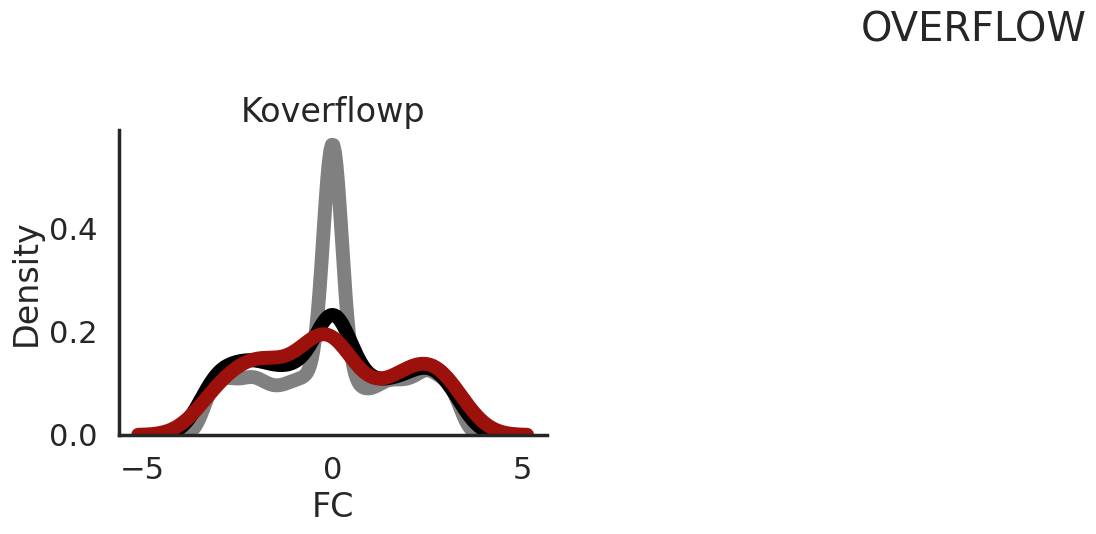

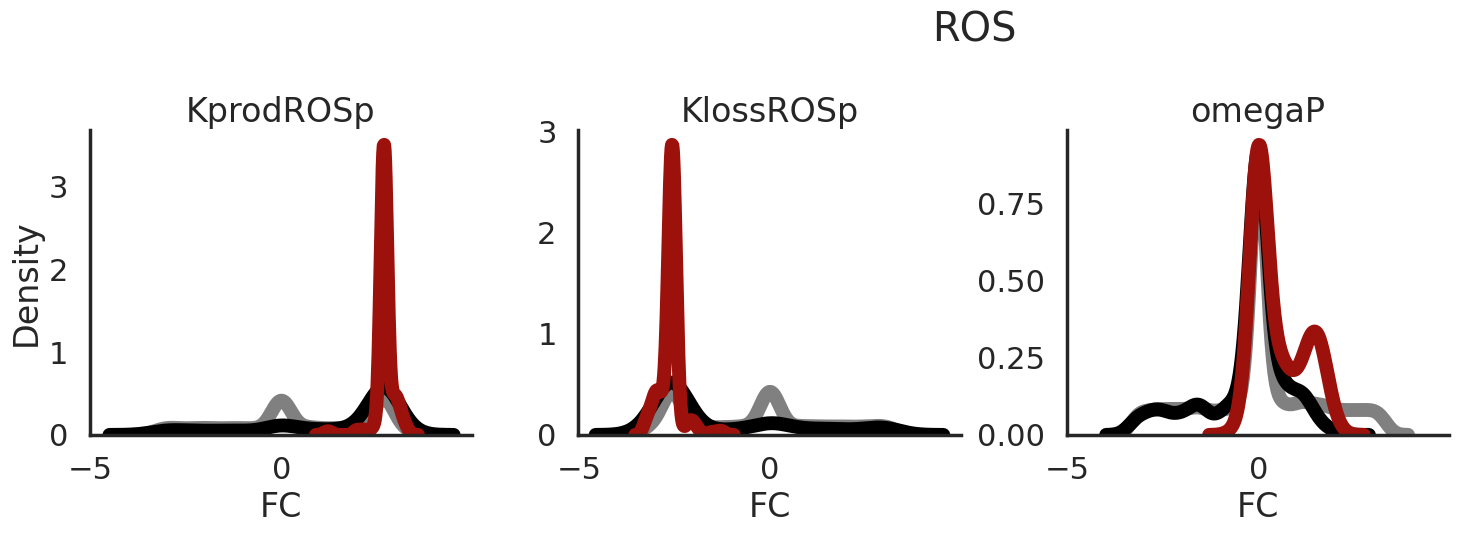

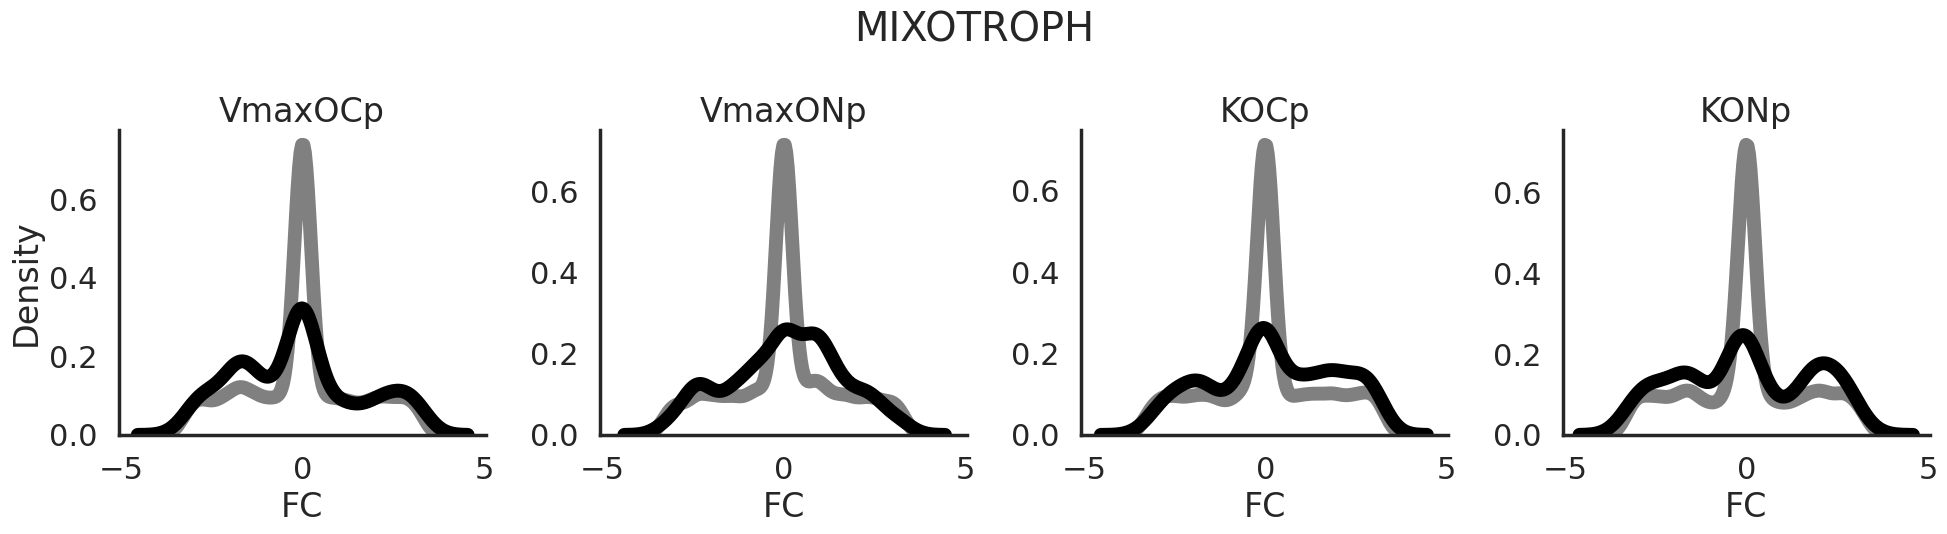

In [86]:
sns.set_context('poster')
min_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')

for model in morder:
    cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values(model, 'PRO')
    cur_pro_params_to_update = [p for p in cur_pro_params_to_update if p not in min_pro_params_to_update]
    if cur_pro_params_to_update:
        sns.displot(
            data=mparams_df.loc[ 
                ~mparams_df['FC'].isna() & 
                mparams_df['variable'].isin(cur_pro_params_to_update) &
                mparams_df['model'].isin([model]) 
    
                               ].reset_index(), 
            common_norm=False,
            col='variable', x='FC', col_wrap=4, #order=gorder,
            hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
            lw=10,
            kind='kde',
            facet_kws=dict(sharey=False),
            col_order=cur_pro_params_to_update,
            legend=False,
        ).set_titles(col_template='{col_name}', row_template='{row_name}')
        plt.suptitle(model, y=1.1)

/tmp/ipykernel_1755355/329395334.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


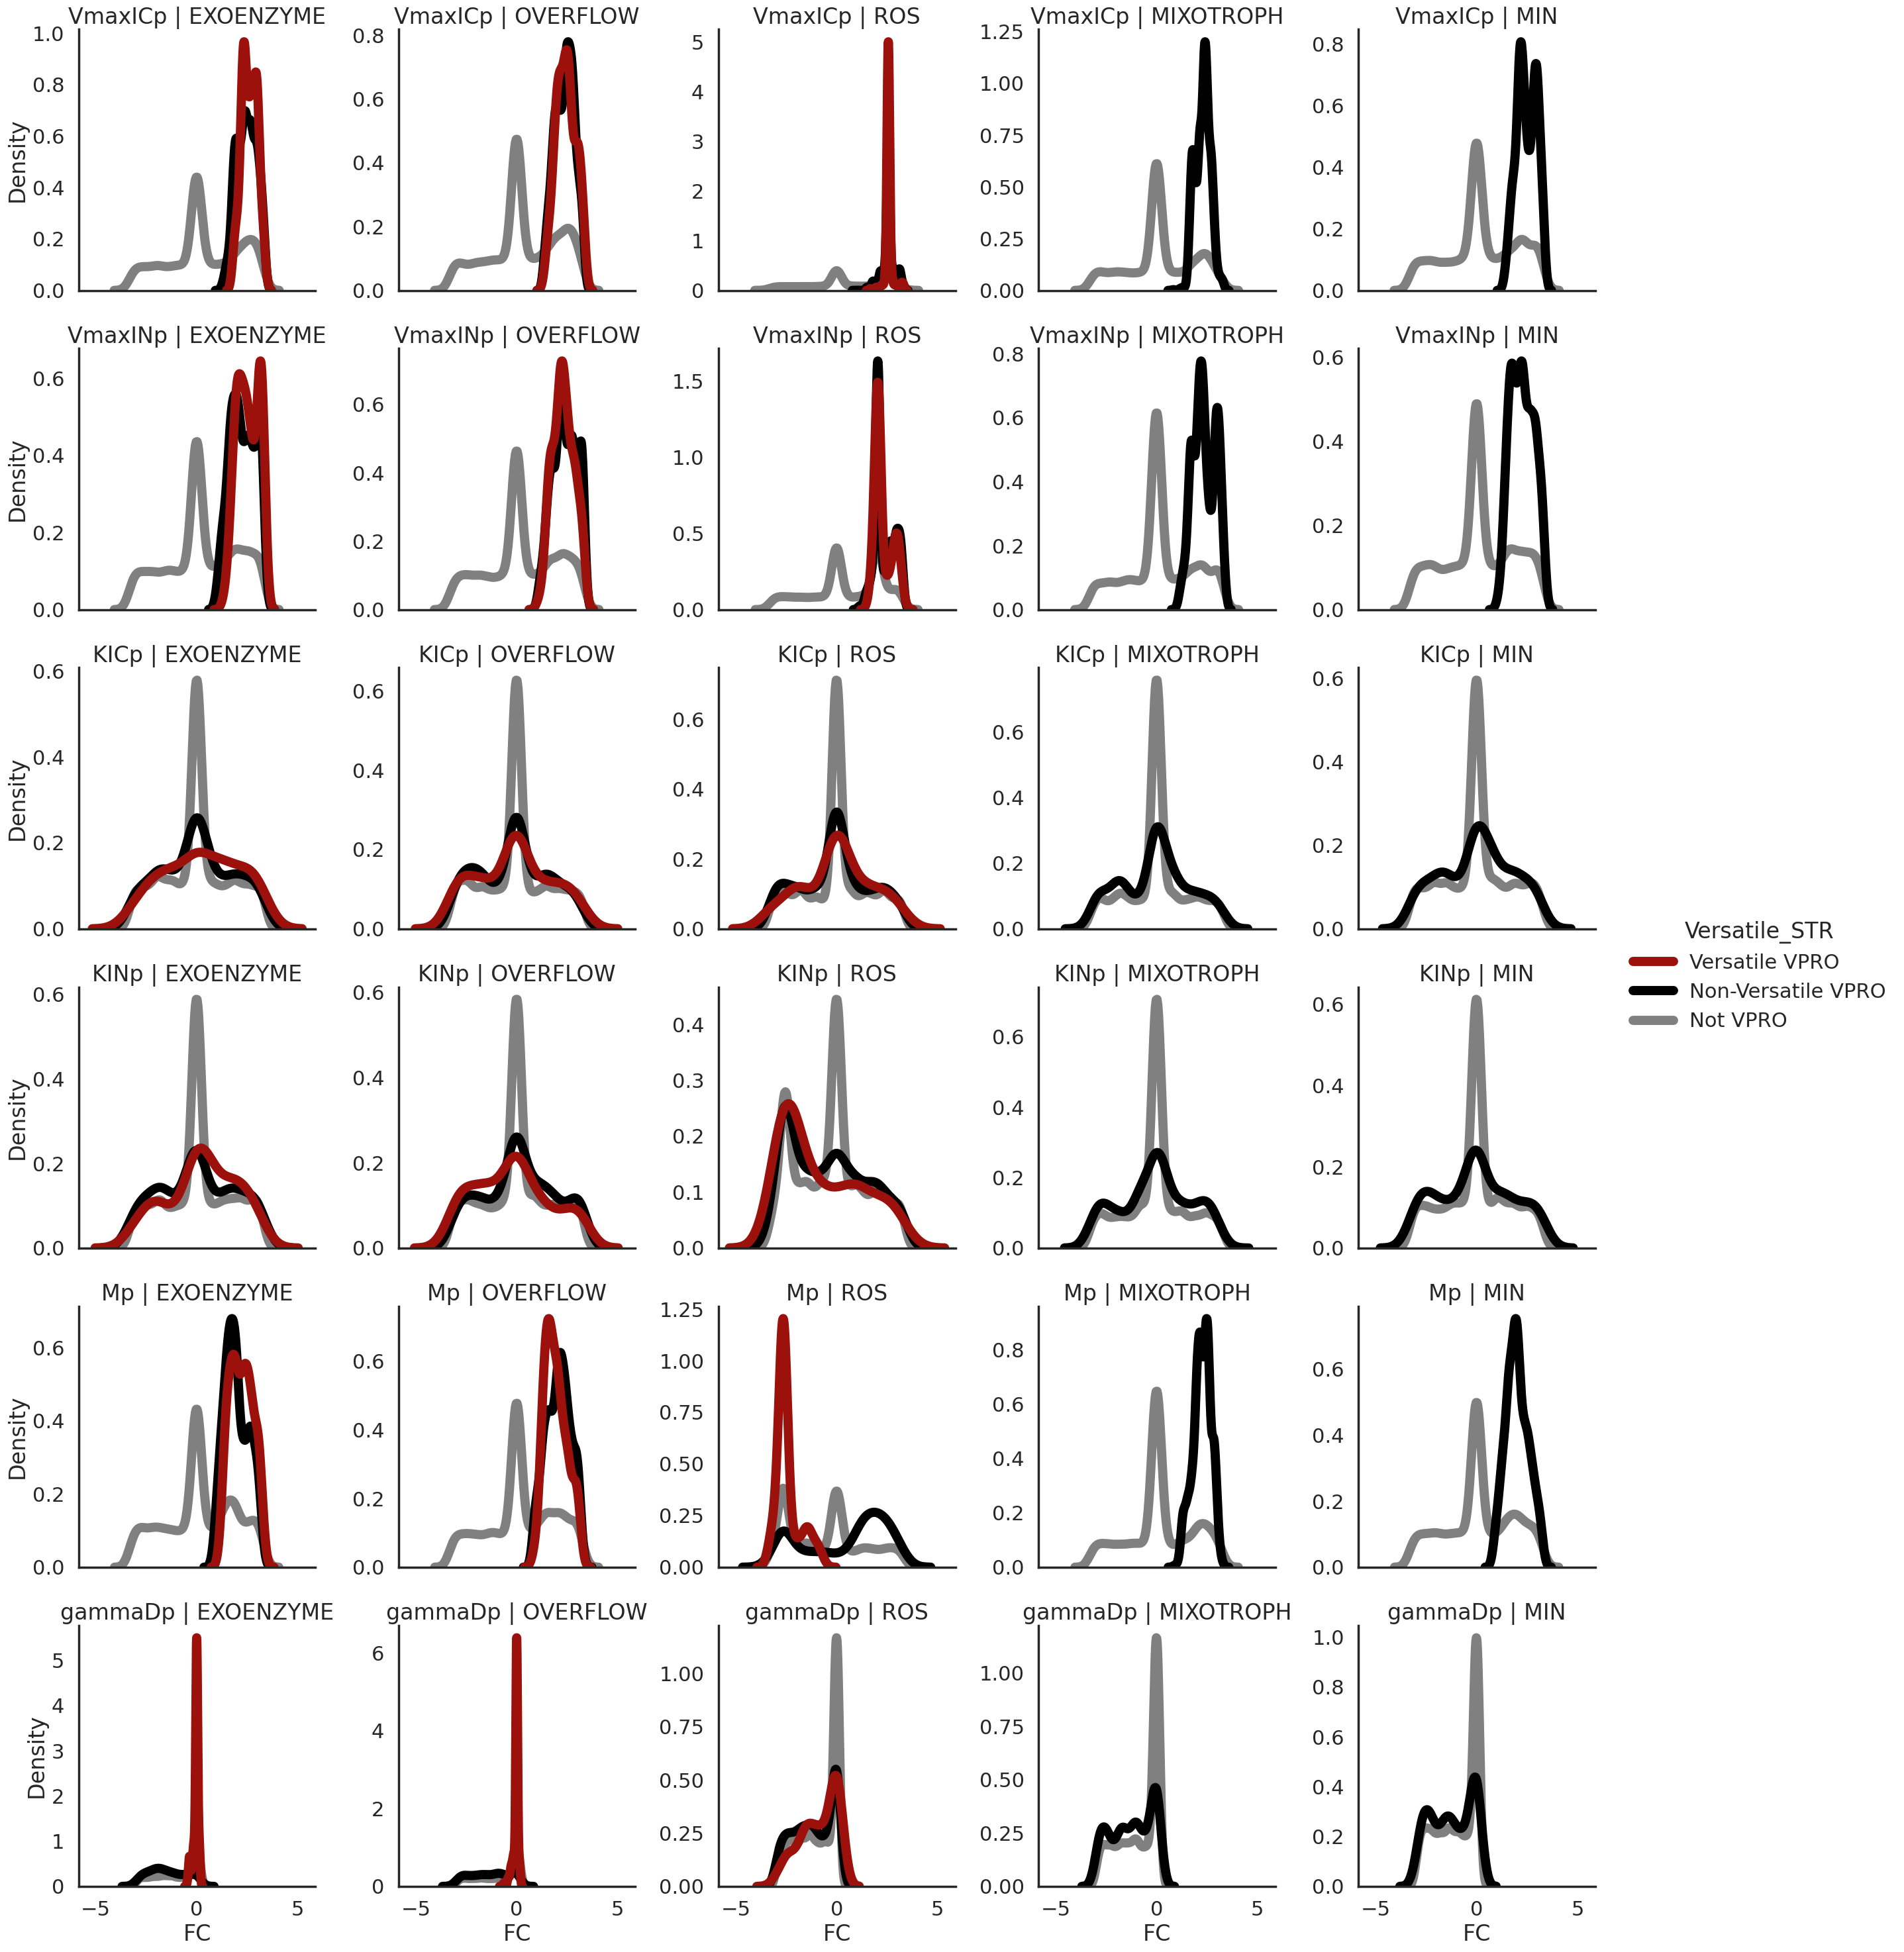

In [87]:
sns.set_context('poster')
cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')
sns.displot(
    data=mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        mparams_df['variable'].isin(cur_pro_params_to_update) #&
        #mparams_df['model'].isin([model]) 

                       ].reset_index(), 
    common_norm=False,
    row='variable', x='FC', row_order=cur_pro_params_to_update,
    col='model', col_order=morder,
    hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
    lw=10,
    kind='kde',
    facet_kws=dict(sharey=False),
).set_titles(col_template='{col_name}', row_template='{row_name}')


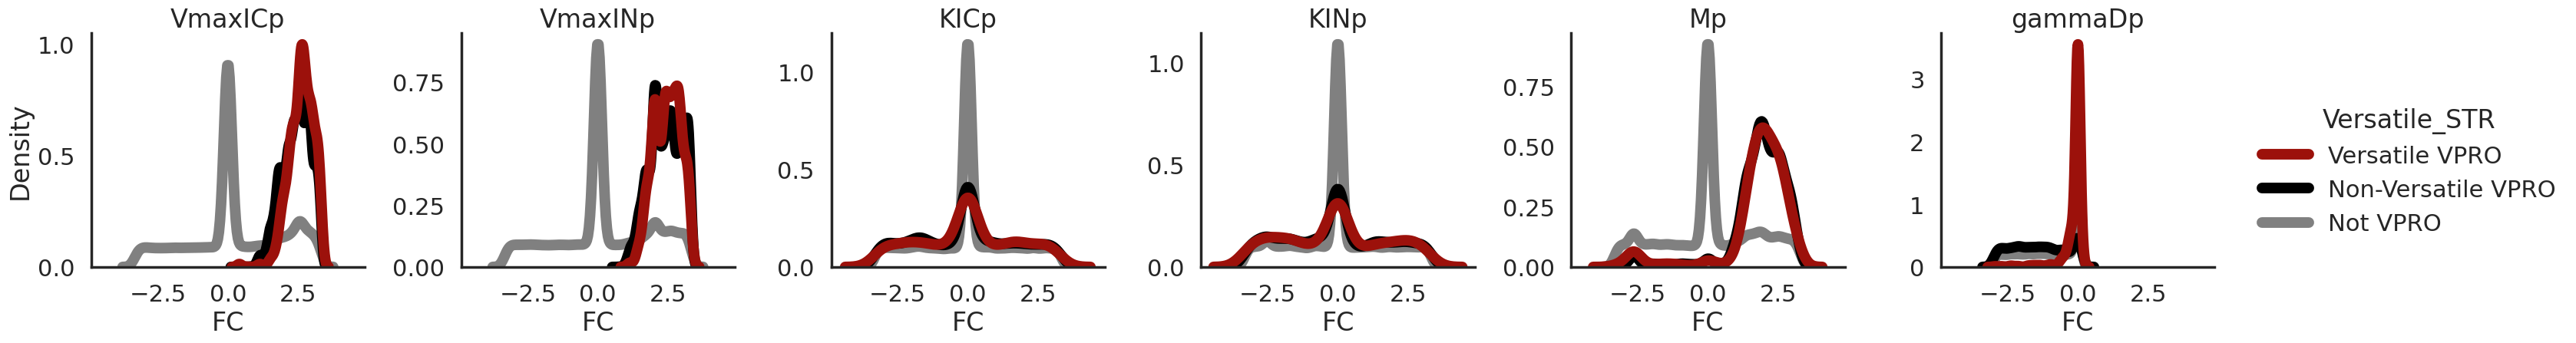

In [88]:
sns.set_context('poster')
cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')
sns.displot(
    data=mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        mparams_df['variable'].isin(cur_pro_params_to_update) #&
        #mparams_df['model'].isin([model]) 

                       ].reset_index(), 
    common_norm=False,
    col='variable', x='FC', col_order=cur_pro_params_to_update,
    #col='model', col_order=morder,
    hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
    lw=10,
    kind='kde',
    facet_kws=dict(sharey=False),
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [89]:
mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        ~mparams_df['variable'].isin(cur_pro_params_to_update) #&
        #mparams_df['model'].isin([model]) 

                       ].model.unique()

array(['MIXOTROPH', 'ROS', 'OVERFLOW', 'EXOENZYME-MIXOTROPH',
       'EXOENZYME-ROS-MIXOTROPH', 'EXOENZYME-ROS',
       'OVERFLOW-EXOENZYME-MIXOTROPH', 'OVERFLOW-EXOENZYME',
       'OVERFLOW-MIXOTROPH', 'OVERFLOW-ROS-EXOENZYME',
       'OVERFLOW-ROS-MIXOTROPH', 'OVERFLOW-ROS',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME', 'ROS-MIXOTROPH'], dtype=object)

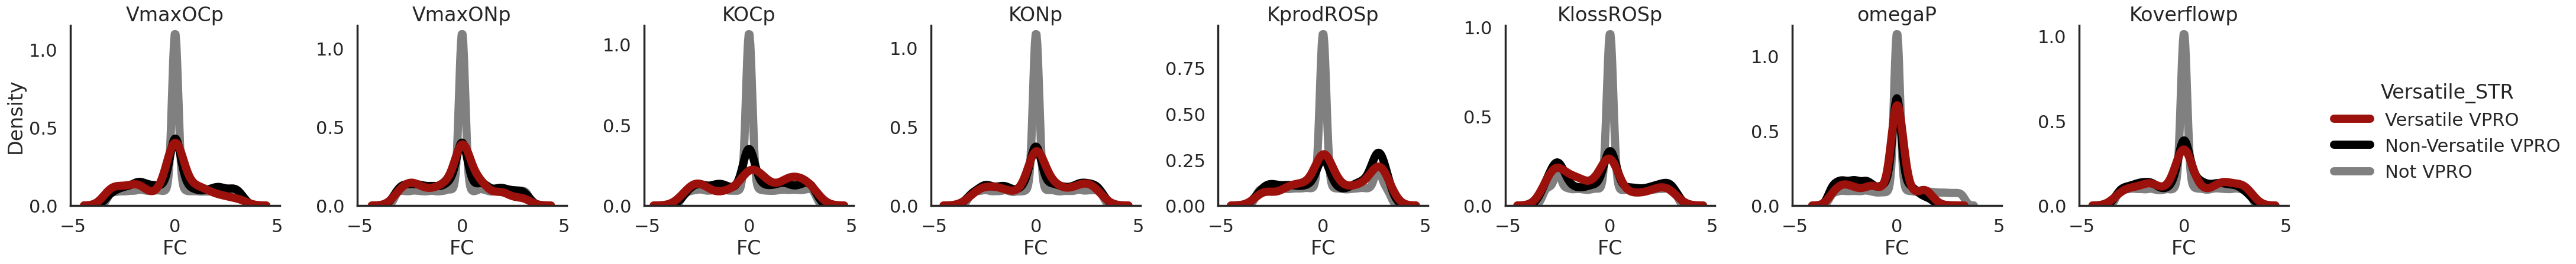

In [90]:
sns.set_context('poster')
cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')
sns.displot(
    data=mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        ~mparams_df['variable'].isin(cur_pro_params_to_update) #&
        #mparams_df['model'].isin([model]) 

                       ].reset_index(), 
    common_norm=False,
    col='variable', x='FC', #col_order=cur_pro_params_to_update,
    #col='model', col_order=morder,
    hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
    lw=10,
    kind='kde',
    facet_kws=dict(sharey=False),
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [91]:
cur_pro_params_to_update

['VmaxICp', 'VmaxINp', 'KICp', 'KINp', 'Mp', 'gammaDp']

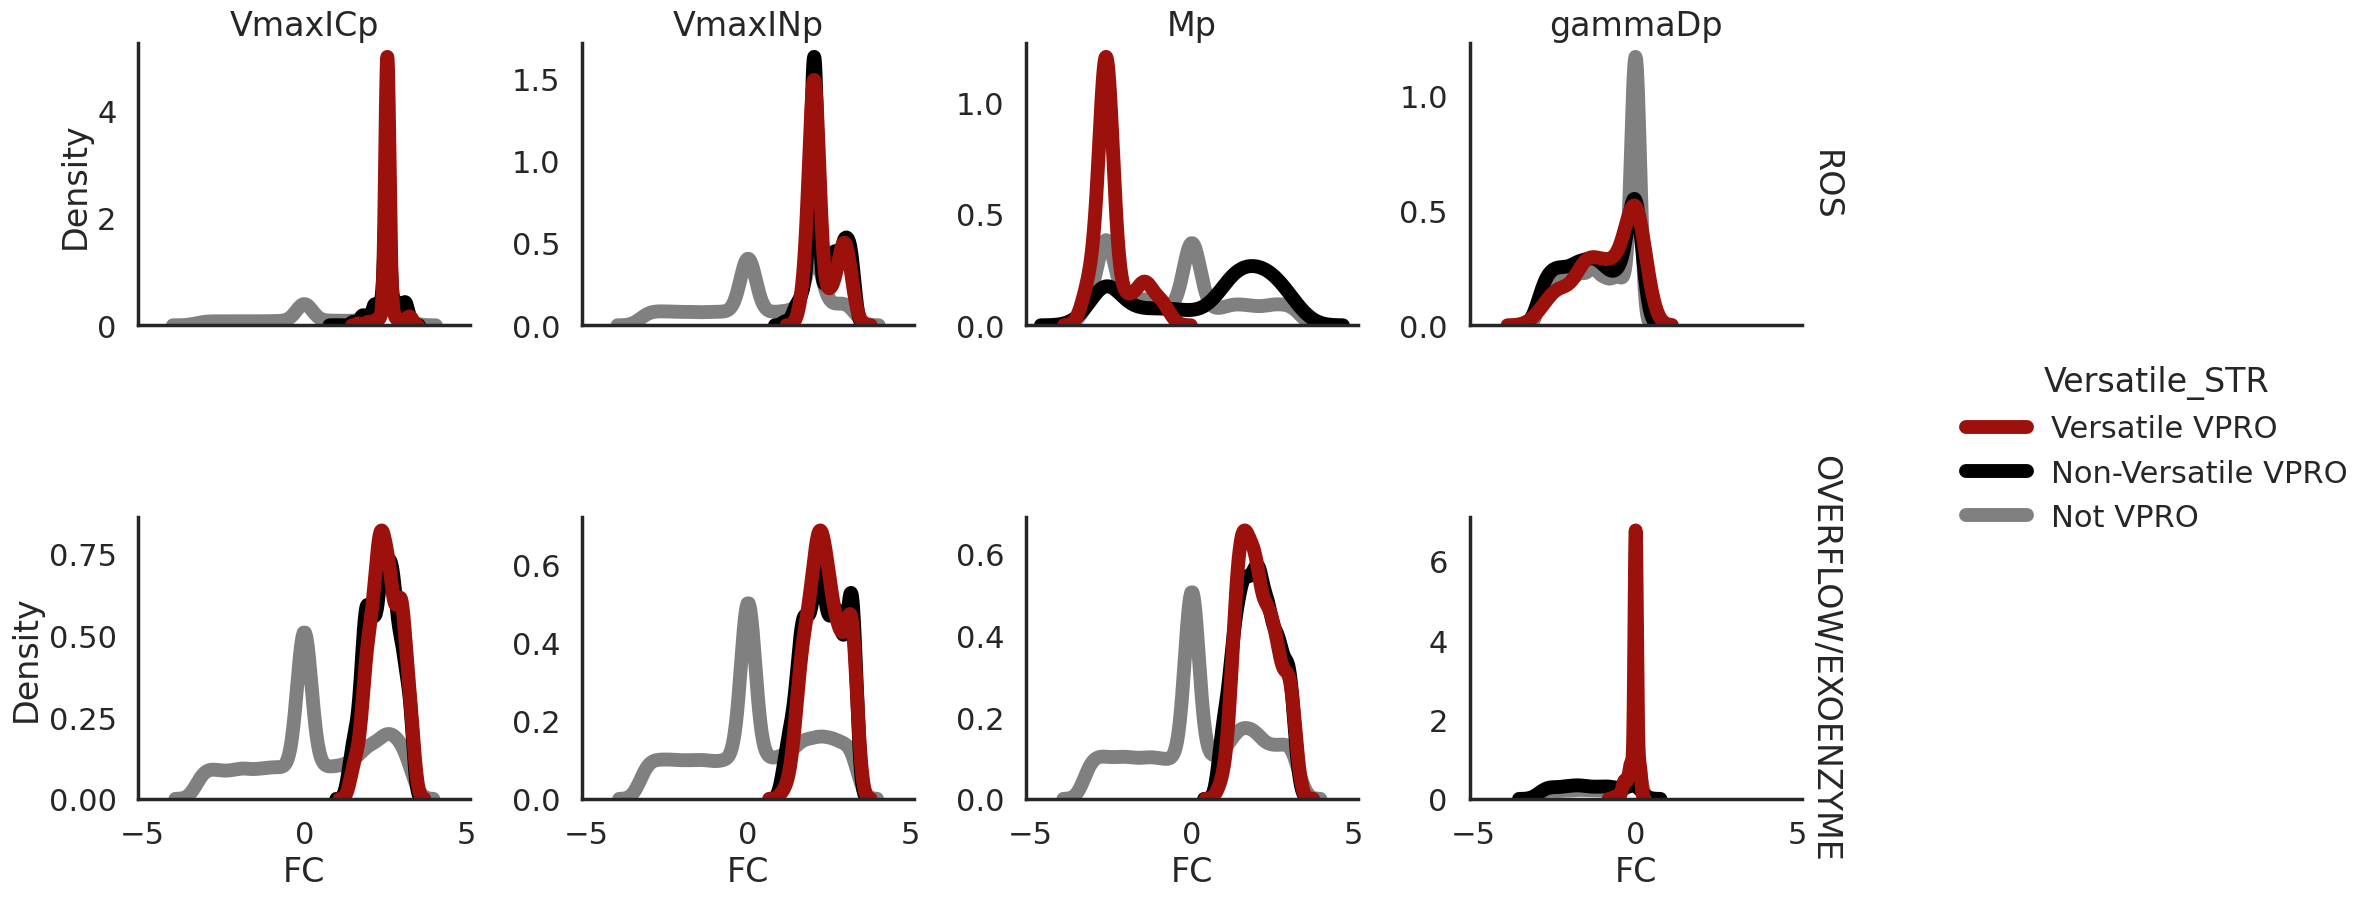

In [92]:
sns.set_context('poster')
porder = ['VmaxICp', 'VmaxINp', 'Mp', 'gammaDp']
sns.displot(
    data=mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        mparams_df['variable'].isin(porder) #&
        #mparams_df['model'].isin([model]) 

                       ].reset_index(), 
    common_norm=False,
    col='variable', x='FC', col_order=porder,
    row='model1', row_order=['ROS', 'OVERFLOW/EXOENZYME'],
    hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
    lw=10,
    kind='kde', 
    facet_kws=dict(sharey=False, margin_titles=True),
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [115]:
pmparams_df = mparams_df.pivot(
    index=id_vars + ['model1'],
    columns='variable', values='FC'
)

In [116]:
pmparams_df = pmparams_df.reset_index()

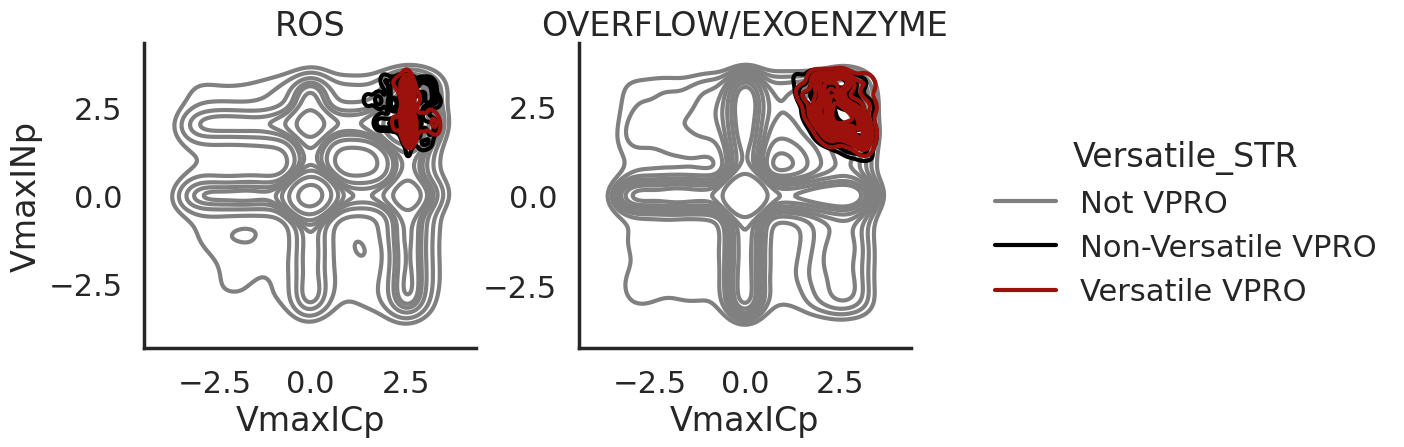

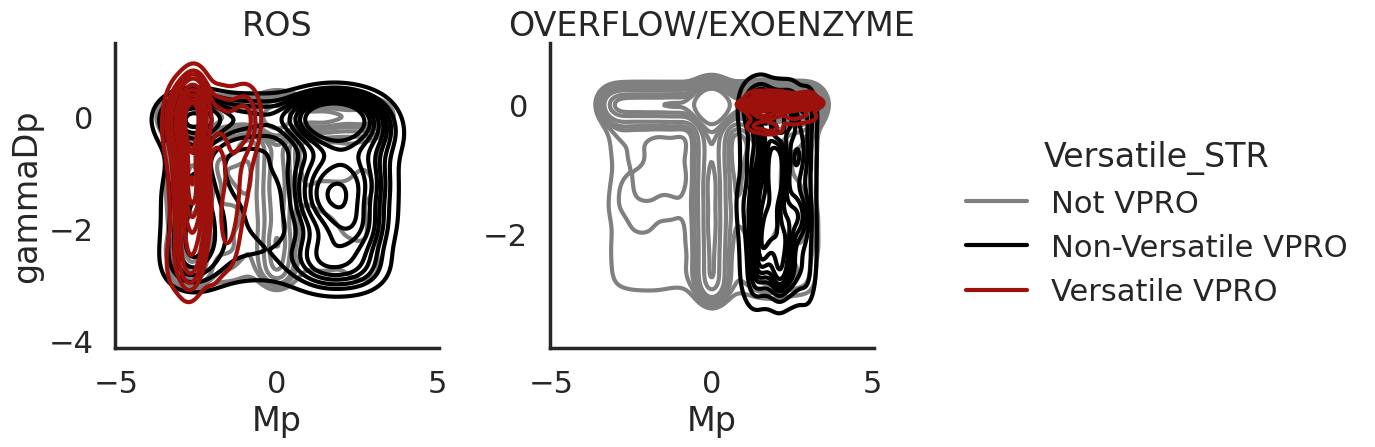

In [117]:
sns.set_context('poster')
 
for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
    sns.displot(
        data=pmparams_df, 
        common_norm=False,
        x=i, y=j,
        col='model1', col_order=['ROS', 'OVERFLOW/EXOENZYME'],
        hue='Versatile_STR', hue_order=vorder, palette=vpalette,
        #lw=10,
        kind='kde', 
        facet_kws=dict(sharey=False, margin_titles=True),
    ).set_titles(col_template='{col_name}', row_template='{row_name}')


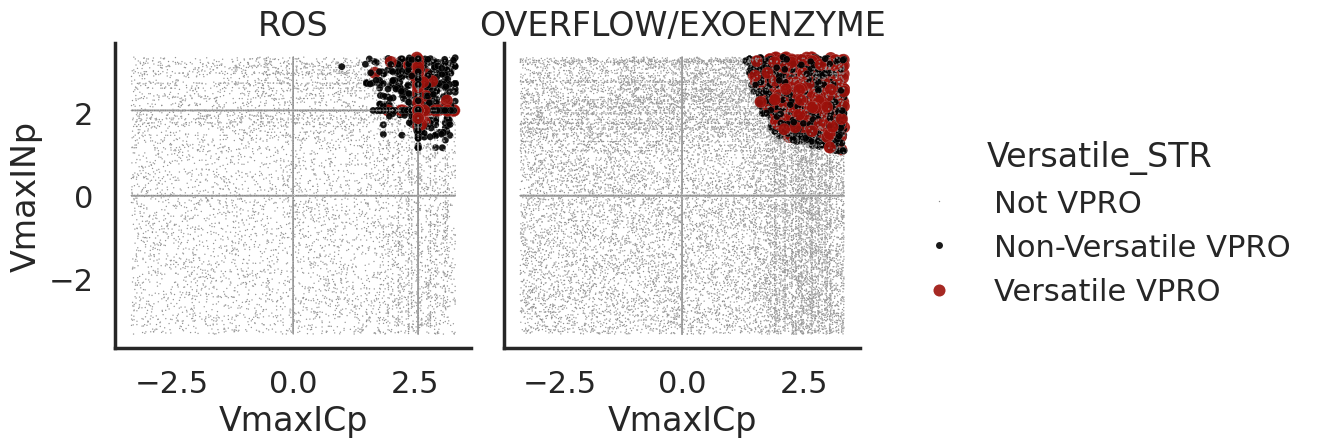

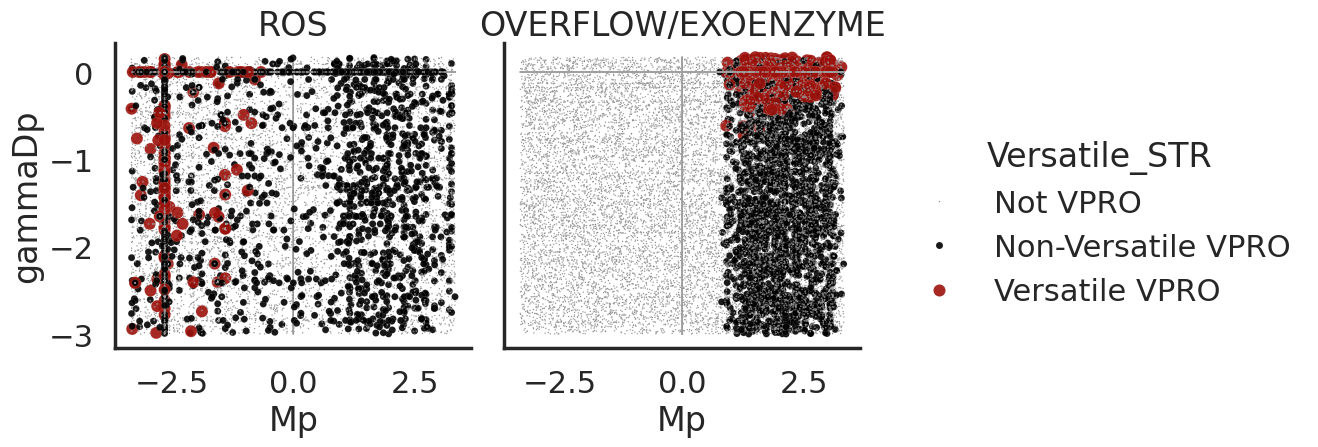

In [118]:
sns.set_context('poster')
 
for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
    sns.relplot(
        data=pmparams_df, 
        #common_norm=False,
        x=i, y=j,
        col='model1', col_order=['ROS', 'OVERFLOW/EXOENZYME'],
        hue='Versatile_STR', hue_order=vorder, palette=vpalette,
        #s=10,
        size='Versatile_STR', size_order=vorder, sizes=dict(zip(vorder, [1, 25,75])), alpha=0.9,
        #lw=10,
        #kind='kde', 
        facet_kws=dict(margin_titles=True),
    ).set_titles(col_template='{col_name}', row_template='{row_name}')


In [119]:
pmparams_df.columns

Index(['run_id', 'idx', 'Phase', 'id', 'model', 'VPRO_nocluster',
       'Versatile_STR', 'model1', 'KICp', 'KINp', 'KOCp', 'KONp', 'KlossROSp',
       'Koverflowp', 'KprodROSp', 'Mp', 'VmaxICp', 'VmaxINp', 'VmaxOCp',
       'VmaxONp', 'gammaDp', 'omegaP'],
      dtype='object', name='variable')

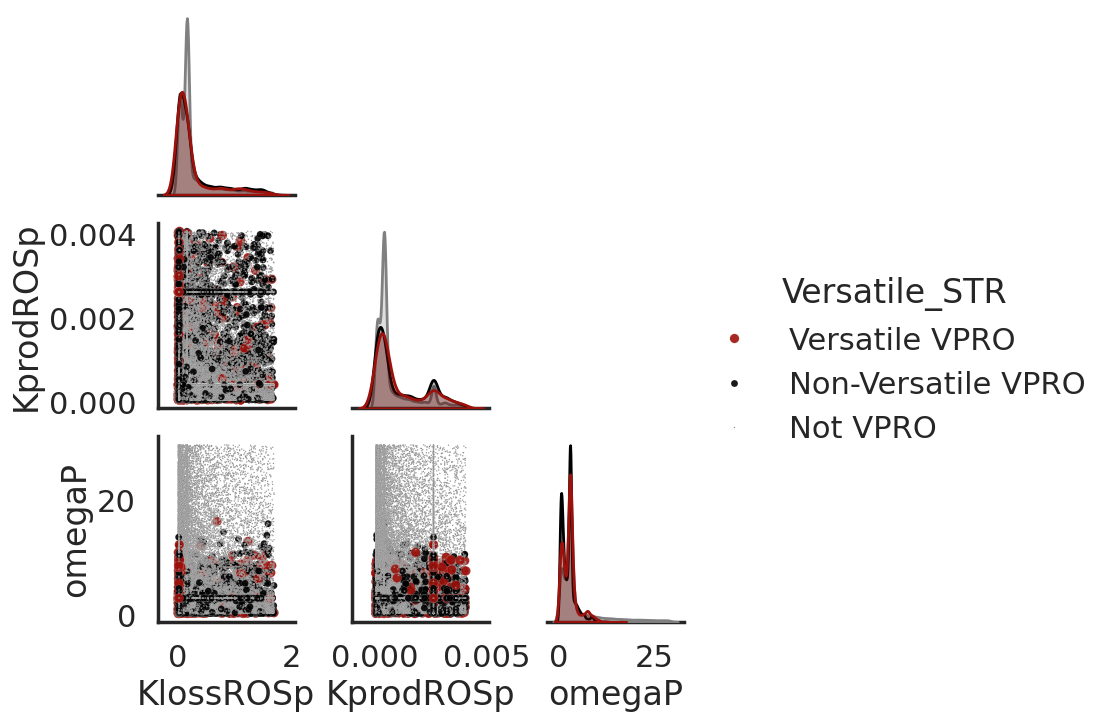

In [99]:
sns.set_context('poster')
 

sns.pairplot(
    data=pmparams_df, 
    vars=['KlossROSp', 'KprodROSp','omegaP'],
     corner=True,
    #plot_kws=dict(s=10),
    
    diag_kws=dict(common_norm=False),    
    #common_norm=False,
    hue='Versatile_STR', hue_order=list(reversed(vorder)), palette=list(reversed(vpalette)),
    plot_kws=dict(size=pmparams_df['Versatile_STR'], sizes=dict(reversed(list(zip(vorder, [1, 25,45])))), alpha=0.9),
    #,
    #lw=10,
    #kind='kde', 
    #facet_kws=dict(sharey=False, margin_titles=True),
)#.set_titles(col_template='{col_name}', row_template='{row_name}')


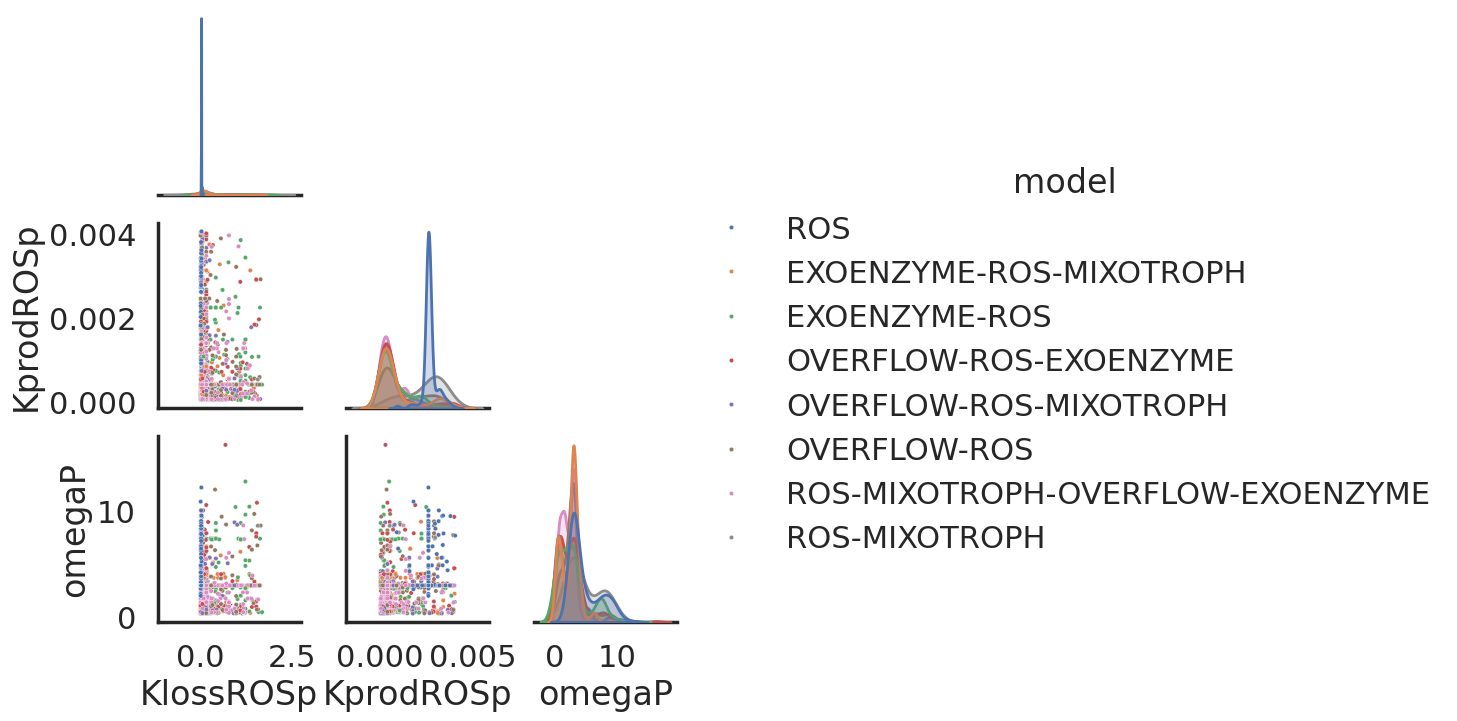

In [114]:
sns.set_context('poster')
 

sns.pairplot(
    data=pmparams_df.loc[pmparams_df.Versatile_STR.isin(['Versatile VPRO']) & ~pmparams_df.KlossROSp.isna()], 
    vars=['KlossROSp', 'KprodROSp','omegaP'],
     corner=True,
    plot_kws=dict(s=10),
    diag_kws=dict(common_norm=False),    
    #common_norm=False,
    hue='model', #hue_order=list(reversed(vorder)), palette=list(reversed(vpalette)),
    #plot_kws=dict(size=pmparams_df['Versatile_STR'], sizes=dict(reversed(list(zip(vorder, [1, 25,45])))), alpha=0.9),
    #,
    #lw=10,
    #kind='kde', 
    #facet_kws=dict(sharey=False, margin_titles=True),
)#.set_titles(col_template='{col_name}', row_template='{row_name}')


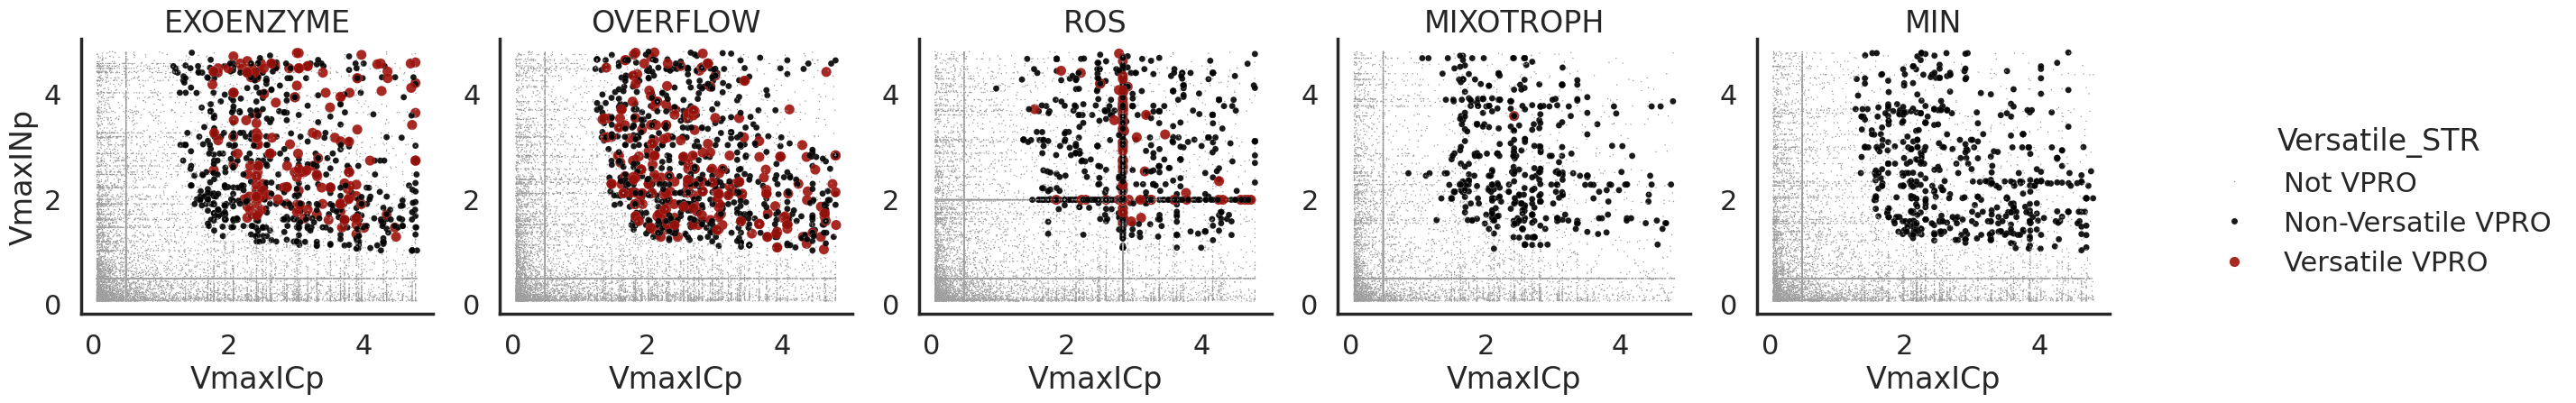

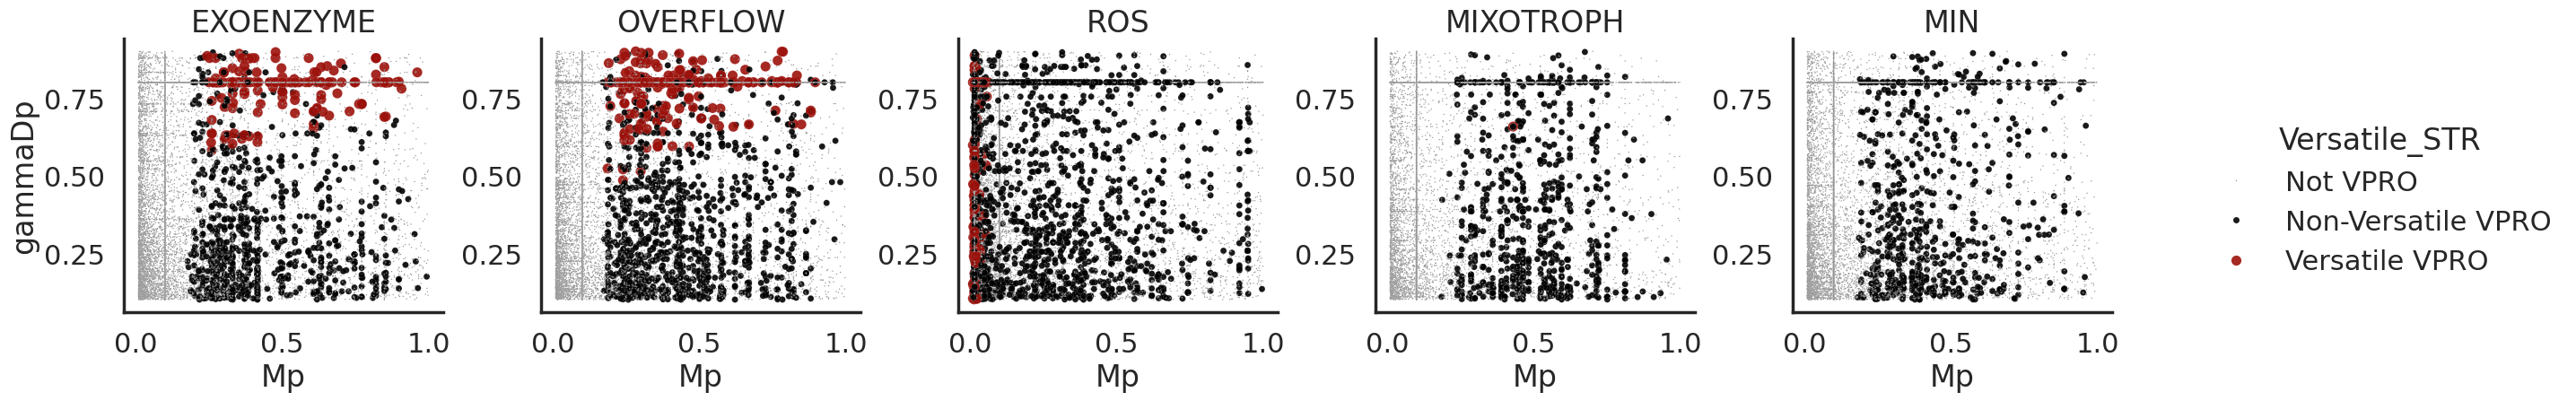

In [100]:
sns.set_context('poster')
 
for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
    sns.relplot(
        data=pmparams_df, 
        #common_norm=False,
        x=i, y=j,
        col='model', col_order=morder,
        hue='Versatile_STR', hue_order=vorder, palette=vpalette,
        #s=10,
        size='Versatile_STR', sizes=dict(zip(vorder, [1, 25,65])), alpha=0.9,
        #lw=10,
        #kind='kde', 
        facet_kws=dict(sharey=False, margin_titles=True),
    ).set_titles(col_template='{col_name}', row_template='{row_name}')


In [101]:
mparams_df

run_id  \
0        monte_ponly_EXOENZYME_86_monte__38_lowN_ponly_...   
1        monte_ponly_EXOENZYME_23_monte__20_lowN_ponly_...   
2        monte_ponly_EXOENZYME_20_monte__81_lowN_ponly_...   
3        monte_ponly_EXOENZYME_77_monte__35_lowN_ponly_...   
4        monte_ponly_EXOENZYME_35_monte__45_lowN_ponly_...   
...                                                    ...   
2289329  monte_ponly_ROS-MIXOTROPH_22_monte__31_lowN_po...   
2289330  monte_ponly_ROS-MIXOTROPH_73_monte__43_lowN_po...   
2289331  monte_ponly_ROS-MIXOTROPH_92_monte__79_lowN_po...   
2289332  monte_ponly_ROS-MIXOTROPH_94_monte__82_lowN_po...   
2289333  monte_ponly_ROS-MIXOTROPH_1_monte__78_lowN_pon...   

                                                       idx Phase  \
0             monte_ponly_EXOENZYME_86_monte__38_EXOENZYME  init   
1             monte_ponly_EXOENZYME_23_monte__20_EXOENZYME  init   
2             monte_ponly_EXOENZYME_20_monte__81_EXOENZYME  init   
3             monte_ponly_EXOENZYME_77_monte__35_EXOENZYME  init   
4             monte_ponly_EXOENZYME_35_monte__45_EXOENZYME  init   
...                                                    ...   ...   
2289329  monte_ponly_ROS-MIXOTROPH_22_monte__31_ROS-MIX...  init   
2289330  monte_ponly_ROS-MIXOTROPH_73_monte__43_ROS-MIX...  init   
2289331  monte_ponly_ROS-MIXOTROPH_92_monte__79_ROS-MIX...  init   
2289332  monte_ponly_ROS-MIXOTROPH_94_monte__82_ROS-MIX...  init   
2289333  monte_ponly_ROS-MIXOTROPH_1_monte__78_ROS-MIXO...  init   

                                             id          model  \
0            monte_ponly_EXOENZYME_86_monte__38      EXOENZYME   
1            monte_ponly_EXOENZYME_23_monte__20      EXOENZYME   
2            monte_ponly_EXOENZYME_20_monte__81      EXOENZYME   
3            monte_ponly_EXOENZYME_77_monte__35      EXOENZYME   
4            monte_ponly_EXOENZYME_35_monte__45      EXOENZYME   
...                                         ...            ...   
2289329  monte_ponly_ROS-MIXOTROPH_22_monte__31  ROS-MIXOTROPH   
2289330  monte_ponly_ROS-MIXOTROPH_73_monte__43  ROS-MIXOTROPH   
2289331  monte_ponly_ROS-MIXOTROPH_92_monte__79  ROS-MIXOTROPH   
2289332  monte_ponly_ROS-MIXOTROPH_94_monte__82  ROS-MIXOTROPH   
2289333   monte_ponly_ROS-MIXOTROPH_1_monte__78  ROS-MIXOTROPH   

                   VPRO_nocluster Versatile_STR variable      value   default  \
0            vpro_86_38_EXOENZYME      Not VPRO  VmaxICp   0.480000  0.000006   
1            vpro_23_20_EXOENZYME      Not VPRO  VmaxICp   0.395899  0.000006   
2            vpro_20_81_EXOENZYME      Not VPRO  VmaxICp   0.386407  0.000006   
3            vpro_77_35_EXOENZYME      Not VPRO  VmaxICp   0.480000  0.000006   
4            vpro_35_45_EXOENZYME      Not VPRO  VmaxICp   4.668549  0.000006   
...                           ...           ...      ...        ...       ...   
2289329  vpro_22_31_ROS-MIXOTROPH      Not VPRO   omegaP  13.379887  0.000034   
2289330  vpro_73_43_ROS-MIXOTROPH      Not VPRO   omegaP   1.560287  0.000034   
2289331  vpro_92_79_ROS-MIXOTROPH      Not VPRO   omegaP   1.901064  0.000034   
2289332  vpro_94_82_ROS-MIXOTROPH      Not VPRO   omegaP   2.942400  0.000034   
2289333   vpro_1_78_ROS-MIXOTROPH      Not VPRO   omegaP  12.490317  0.000034   

               FC              model1  
0        0.000000  OVERFLOW/EXOENZYME  
1       -0.277900  OVERFLOW/EXOENZYME  
2       -0.312912  OVERFLOW/EXOENZYME  
3        0.000000  OVERFLOW/EXOENZYME  
4        3.281868  OVERFLOW/EXOENZYME  
...           ...                 ...  
2289329  2.185001                 nan  
2289330 -0.915182                 nan  
2289331 -0.630186                 nan  
2289332  0.000000                 nan  
2289333  2.085745                 nan  

[2289334 rows x 12 columns]

In [104]:
df.pivot_table(columns='Versatile_STR', index='model', values='idx', aggfunc='count')

Versatile_STR                     Non-Versatile VPRO  Not VPRO  Versatile VPRO
model                                                                         
EXOENZYME                                      803.0   15737.0           200.0
EXOENZYME-MIXOTROPH                            929.0   12077.0            92.0
EXOENZYME-ROS                                  608.0   12132.0           212.0
EXOENZYME-ROS-MIXOTROPH                       1154.0   12528.0           315.0
MIN                                            718.0   13593.0             NaN
MIXOTROPH                                     1230.0   12265.0             1.0
OVERFLOW                                      1215.0   15312.0           314.0
OVERFLOW-EXOENZYME                             910.0   13792.0           226.0
OVERFLOW-EXOENZYME-MIXOTROPH                  1223.0   12552.0           217.0
OVERFLOW-MIXOTROPH                            1500.0   12733.0           159.0
OVERFLOW-ROS                                   880.0   12450.0           189.0
OVERFLOW-ROS-EXOENZYME                         771.0   12715.0           255.0
OVERFLOW-ROS-MIXOTROPH                        1215.0   12127.0           154.0
ROS                                           1925.0   20200.0           169.0
ROS-MIXOTROPH                                  886.0   11403.0             9.0
ROS-MIXOTROPH-OVERFLOW-EXOENZYME               996.0   11725.0           271.0

In [102]:
df.columns

Index(['VmaxICp', 'VmaxICh', 'VmaxINp', 'VmaxINh', 'VmaxOCp', 'VmaxOCh',
       'VmaxONp', 'VmaxONh', 'KICp', 'KICh', 'KINp', 'KINh', 'KOCp', 'KOCh',
       'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'QCmaxp',
       'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp', 'Kmtbh', 'bp', 'bh', 'r0p',
       'r0h', 'KdecayDON', 'KprodEXOp', 'KprodEXOh', 'OverflowMode',
       'Koverflowp', 'Koverflowh', 'ROSMode', 'KprodROSp', 'KprodROSh',
       'KlossROSp', 'KlossROSh', 'KdecayROS', 'omegaP', 'omegaH', 'ROSmaxD',
       'run_id', 'idx', 'Phase', 'id', 'media', 'which', 'model', 'hash',
       'VPRO_nocluster', 'VPRO', 'Versatile_STR'],
      dtype='object')

In [107]:
vpro_df.loc[vpro_df.Versatile.isin([True]) & vpro_df.model.isin(['MIXOTROPH'])]



model                                     VPRO  Inhibited  Neutral  \
5965  MIXOTROPH  vpro_3_67_77_MIXOTROPH_C2__85_MIXOTROPH          0        3   

      Other  Strong  Sustained  Weak  pos_interaction  neg_interaction  \
5965    7.0     NaN        1.0     4                1                4   

      Versatile   Phase                           VPRO_nocluster  \
5965       True  extend  vpro_3_67_77_MIXOTROPH_C2__85_MIXOTROPH   

       Versatile_STR  
5965  Versatile VPRO

In [110]:
df.loc[df.Versatile_STR.isin(['Versatile VPRO']) & df.model.isin(['MIXOTROPH'])].T



85134
VmaxICp                                                  0.000028
VmaxICh                                                       0.0
VmaxINp                                                  0.000041
VmaxINh                                                  0.000067
VmaxOCp                                                       0.0
VmaxOCh                                                  0.000067
VmaxONp                                                  0.000008
VmaxONh                                                  0.000067
KICp                                                         37.0
KICh                                                          1.0
KINp                                                     0.076732
KINh                                                         0.02
KOCp                                                     0.058421
KOCh                                                          0.1
KONp                                                     0.068512
KONh                                                          0.1
Mp                                                       0.000005
Mh                                                       0.000001
gammaDp                                                  0.657553
gammaDh                                                       0.8
Rp                                                          6.625
Rh                                                            5.0
QCmaxp                                                       10.0
QCminp                                                        4.0
QCmaxh                                                       10.0
QCminh                                                        4.0
Kmtbp                                                    0.000035
Kmtbh                                                    0.000175
bp                                                           0.01
bh                                                           0.01
r0p                                                      0.000002
r0h                                                      0.000002
KdecayDON                                                     0.0
KprodEXOp                                                     0.0
KprodEXOh                                                     0.0
OverflowMode                                                  0.0
Koverflowp                                                    0.0
Koverflowh                                                    0.0
ROSMode                                                       0.0
KprodROSp                                                     0.0
KprodROSh                                                     0.0
KlossROSp                                                     0.0
KlossROSh                                                     0.0
KdecayROS                                                     0.0
omegaP                                                        0.0
omegaH                                                        0.0
ROSmaxD                                                       0.0
run_id          monte_add_ponly_MIXOTROPH_vpro_67_77_MIXOTROPH...
idx             monte_add_ponly_MIXOTROPH_vpro_67_77_MIXOTROPH...
Phase                                                      extend
id              monte_add_ponly_MIXOTROPH_vpro_67_77_MIXOTROPH...
media                                                        lowN
which                                                       ponly
model                                                   MIXOTROPH
hash                                        h-4099550644953532281
VPRO_nocluster            vpro_3_67_77_MIXOTROPH_C2__85_MIXOTROPH
VPRO                      vpro_3_67_77_MIXOTROPH_C2__85_MIXOTROPH
Versatile_STR                                      Versatile VPRO